### Topic extraction with Non-negative Matrix Factorization for Document-words 


This is an example of applying :class:sklearn.decomposition.NMF on a corpus of documents and extract additive models of the topic structure of the corpus. The output is a list of topics, each represented as a list of terms (weights are not shown).

Non-negative Matrix Factorzation is applied with two different objective functions: the Frobenius norm, and the generalized Kullback-Leibler divergence. The latter is equivalent to Probabilistic Latent Semantic Indexing.

The default parameters (n_samples / n_features / n_components) should make the example runnable in a couple of tens of seconds. You can try to increase the dimensions of the problem, but be aware that the time complexity is polynomial in NMF. In LDA, the time complexity is proportional to (n_samples * iterations).

In [1]:
import sys
from time import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from scipy.sparse import *
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import seaborn as sns
from numpy import count_nonzero
n_samples = 2000
n_features = 1000
n_components = 20
n_top_words = 20



In [2]:
print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("The size of the dataset is %d." % (len(data_samples)))
#print(data_samples)
print("done in %0.3fs." % (time() - t0))

Loading dataset...
The size of the dataset is 2000.
done in 1.311s.


In [3]:
# Machine learning algorithms cannot work with raw text directly. Rather, the text must be converted into vectors of numbers.
# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics 
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Extracting term frequency as features for NMF...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
#print(tf)
tf_feature_names= tf_vectorizer.get_feature_names()
print("done in %0.3fs." % (time() - t0))
#tf


Extracting term frequency as features for NMF...
done in 0.217s.


In [4]:
tf_feature_names= tf_vectorizer.get_feature_names()
vocabulary= np.array(tf_feature_names)
#print(tf_feature_names)

In [5]:

## The default parameter of NMF :

##class sklearn.decomposition.NMF(n_components=None, *, init=None, solver='cd', beta_loss='frobenius', 
##                                tol=0.0001, max_iter=200, random_state=None,
#    
## Case-1 : Where the initialization(init) = nndsvd (sparce data) and beta loss = frobenius
## solver = coordianate descent , random_state =1 

#t0 = time()
print("Fitting the NMF model (Kullback-leibler)  with 'nndsvda' initializer and 'mu' solver ,n_samples=%d and n_features=%d...Where the initialization(init) = nndsvd (sparce data) and beta loss = frobenius solver = coordianate descent , random_state =1"% (n_samples, n_features))
nmf1 = NMF(n_components=n_components, random_state=1,max_iter=1000, 
          beta_loss='kullback-leibler', solver='mu', alpha= 0.0,init='nndsvda',verbose=True,
          l1_ratio= 1.0).fit(tf)

print(nmf1.get_params())
print("#iterations= %d" % nmf1.n_iter_)
print("reconstruction error= %e" % nmf1.reconstruction_err_)

document_topics1 = nmf1.fit_transform(tf) # W1 Matrix
topic_terms1 = nmf1.components_  # H1 Matrix



Fitting the NMF model (Kullback-leibler)  with 'nndsvda' initializer and 'mu' solver ,n_samples=2000 and n_features=1000...Where the initialization(init) = nndsvd (sparce data) and beta loss = frobenius solver = coordianate descent , random_state =1
Epoch 10 reached after 0.136 seconds, error: 564.427077
Epoch 20 reached after 0.239 seconds, error: 561.301031
Epoch 30 reached after 0.344 seconds, error: 560.312673
Epoch 40 reached after 0.449 seconds, error: 559.876856
Epoch 50 reached after 0.551 seconds, error: 559.629776
Epoch 60 reached after 0.656 seconds, error: 559.461535
Epoch 70 reached after 0.760 seconds, error: 559.342993
Epoch 80 reached after 0.867 seconds, error: 559.263603
Epoch 90 reached after 0.971 seconds, error: 559.170286
Epoch 100 reached after 1.085 seconds, error: 559.093685
Epoch 110 reached after 1.189 seconds, error: 559.024910
{'alpha': 0.0, 'beta_loss': 'kullback-leibler', 'init': 'nndsvda', 'l1_ratio': 1.0, 'max_iter': 1000, 'n_components': 20, 'random_st

The NMF model decompose the terms frequency matrix 2000X1000 matrix into two array of dimension 20X1000(H1) and dimension 2000X20 (W1). 

<img src="nmf_doc_.png" alt="NMF on documents" style="width: 80%"/>

In [6]:
# Check data
print(tf)
print(tf.toarray())
print(type(tf))
print(tf.shape)
print(tf.nnz)  # Number of non-zeros

  (0, 130)	1
  (0, 206)	1
  (0, 286)	1
  (0, 410)	1
  (0, 412)	1
  (0, 432)	1
  (0, 488)	2
  (0, 493)	1
  (0, 527)	1
  (0, 548)	1
  (0, 567)	1
  (0, 587)	4
  (0, 708)	1
  (0, 717)	1
  (0, 748)	1
  (0, 750)	1
  (0, 764)	1
  (0, 841)	1
  (0, 862)	1
  (0, 867)	1
  (0, 881)	1
  (0, 904)	1
  (0, 923)	1
  (0, 988)	1
  (1, 66)	1
  :	:
  (1998, 842)	1
  (1998, 856)	3
  (1998, 869)	1
  (1998, 906)	2
  (1998, 907)	2
  (1998, 908)	1
  (1998, 911)	1
  (1998, 912)	2
  (1998, 918)	1
  (1998, 937)	1
  (1998, 957)	1
  (1998, 968)	3
  (1998, 970)	1
  (1998, 976)	2
  (1998, 982)	1
  (1998, 984)	1
  (1998, 991)	1
  (1998, 994)	1
  (1998, 997)	3
  (1998, 998)	1
  (1998, 999)	1
  (1999, 286)	1
  (1999, 356)	1
  (1999, 366)	1
  (1999, 738)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 3 1 1]
 [0 0 0 ... 0 0 0]]
<class 'scipy.sparse.csr.csr_matrix'>
(2000, 1000)
51752


In [7]:
print(tf.toarray())
print(type(tf.toarray()))
print(isspmatrix(tf))
print(isspmatrix(tf.toarray()))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 3 1 1]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
True
False


In [8]:
print(tf.indptr[1])
print(tf.shape[0])

24
2000


In [9]:
for r in range(tf.shape[0]):
    for ind in range(tf.indptr[r], tf.indptr[r+1]):
        print("(row= %d, col= %d) | data= %f" % (r, tf.indices[ind], tf.data[ind]))

(row= 0, col= 130) | data= 1.000000
(row= 0, col= 206) | data= 1.000000
(row= 0, col= 286) | data= 1.000000
(row= 0, col= 410) | data= 1.000000
(row= 0, col= 412) | data= 1.000000
(row= 0, col= 432) | data= 1.000000
(row= 0, col= 488) | data= 2.000000
(row= 0, col= 493) | data= 1.000000
(row= 0, col= 527) | data= 1.000000
(row= 0, col= 548) | data= 1.000000
(row= 0, col= 567) | data= 1.000000
(row= 0, col= 587) | data= 4.000000
(row= 0, col= 708) | data= 1.000000
(row= 0, col= 717) | data= 1.000000
(row= 0, col= 748) | data= 1.000000
(row= 0, col= 750) | data= 1.000000
(row= 0, col= 764) | data= 1.000000
(row= 0, col= 841) | data= 1.000000
(row= 0, col= 862) | data= 1.000000
(row= 0, col= 867) | data= 1.000000
(row= 0, col= 881) | data= 1.000000
(row= 0, col= 904) | data= 1.000000
(row= 0, col= 923) | data= 1.000000
(row= 0, col= 988) | data= 1.000000
(row= 1, col= 66) | data= 1.000000
(row= 1, col= 71) | data= 1.000000
(row= 1, col= 86) | data= 1.000000
(row= 1, col= 121) | data= 1.00

(row= 10, col= 976) | data= 3.000000
(row= 10, col= 982) | data= 3.000000
(row= 10, col= 984) | data= 3.000000
(row= 10, col= 986) | data= 1.000000
(row= 10, col= 988) | data= 3.000000
(row= 10, col= 990) | data= 2.000000
(row= 10, col= 992) | data= 4.000000
(row= 10, col= 993) | data= 9.000000
(row= 10, col= 994) | data= 1.000000
(row= 10, col= 999) | data= 1.000000
(row= 11, col= 48) | data= 1.000000
(row= 11, col= 51) | data= 1.000000
(row= 11, col= 176) | data= 2.000000
(row= 11, col= 210) | data= 1.000000
(row= 11, col= 229) | data= 2.000000
(row= 11, col= 544) | data= 1.000000
(row= 11, col= 622) | data= 1.000000
(row= 11, col= 674) | data= 1.000000
(row= 11, col= 747) | data= 1.000000
(row= 11, col= 751) | data= 1.000000
(row= 11, col= 787) | data= 1.000000
(row= 12, col= 323) | data= 1.000000
(row= 12, col= 409) | data= 1.000000
(row= 12, col= 842) | data= 1.000000
(row= 12, col= 896) | data= 1.000000
(row= 13, col= 66) | data= 3.000000
(row= 13, col= 68) | data= 1.000000
(row=

(row= 85, col= 571) | data= 1.000000
(row= 85, col= 584) | data= 2.000000
(row= 85, col= 660) | data= 1.000000
(row= 85, col= 687) | data= 1.000000
(row= 85, col= 725) | data= 1.000000
(row= 85, col= 791) | data= 3.000000
(row= 85, col= 828) | data= 1.000000
(row= 85, col= 902) | data= 2.000000
(row= 85, col= 903) | data= 2.000000
(row= 85, col= 919) | data= 2.000000
(row= 85, col= 956) | data= 1.000000
(row= 86, col= 3) | data= 1.000000
(row= 86, col= 101) | data= 1.000000
(row= 86, col= 140) | data= 3.000000
(row= 86, col= 178) | data= 1.000000
(row= 86, col= 192) | data= 1.000000
(row= 86, col= 215) | data= 1.000000
(row= 86, col= 291) | data= 1.000000
(row= 86, col= 301) | data= 2.000000
(row= 86, col= 409) | data= 1.000000
(row= 86, col= 410) | data= 1.000000
(row= 86, col= 445) | data= 1.000000
(row= 86, col= 465) | data= 1.000000
(row= 86, col= 475) | data= 1.000000
(row= 86, col= 497) | data= 1.000000
(row= 86, col= 531) | data= 1.000000
(row= 86, col= 533) | data= 3.000000
(ro

(row= 193, col= 338) | data= 1.000000
(row= 193, col= 566) | data= 1.000000
(row= 193, col= 635) | data= 1.000000
(row= 193, col= 713) | data= 1.000000
(row= 193, col= 721) | data= 1.000000
(row= 194, col= 118) | data= 1.000000
(row= 194, col= 120) | data= 1.000000
(row= 194, col= 167) | data= 2.000000
(row= 194, col= 188) | data= 1.000000
(row= 194, col= 306) | data= 1.000000
(row= 194, col= 356) | data= 1.000000
(row= 194, col= 394) | data= 1.000000
(row= 194, col= 460) | data= 2.000000
(row= 194, col= 506) | data= 1.000000
(row= 194, col= 533) | data= 1.000000
(row= 194, col= 581) | data= 1.000000
(row= 194, col= 609) | data= 4.000000
(row= 194, col= 640) | data= 1.000000
(row= 194, col= 656) | data= 2.000000
(row= 194, col= 676) | data= 2.000000
(row= 194, col= 698) | data= 1.000000
(row= 194, col= 713) | data= 1.000000
(row= 194, col= 726) | data= 1.000000
(row= 194, col= 736) | data= 1.000000
(row= 194, col= 754) | data= 1.000000
(row= 194, col= 791) | data= 1.000000
(row= 194, c

(row= 266, col= 154) | data= 2.000000
(row= 266, col= 306) | data= 1.000000
(row= 266, col= 409) | data= 1.000000
(row= 266, col= 566) | data= 1.000000
(row= 266, col= 756) | data= 1.000000
(row= 267, col= 24) | data= 1.000000
(row= 267, col= 49) | data= 1.000000
(row= 267, col= 143) | data= 1.000000
(row= 267, col= 228) | data= 1.000000
(row= 267, col= 413) | data= 1.000000
(row= 267, col= 538) | data= 1.000000
(row= 267, col= 563) | data= 1.000000
(row= 267, col= 629) | data= 1.000000
(row= 267, col= 656) | data= 1.000000
(row= 267, col= 663) | data= 1.000000
(row= 267, col= 714) | data= 2.000000
(row= 267, col= 747) | data= 1.000000
(row= 267, col= 773) | data= 1.000000
(row= 267, col= 787) | data= 2.000000
(row= 267, col= 975) | data= 1.000000
(row= 267, col= 979) | data= 1.000000
(row= 268, col= 1) | data= 1.000000
(row= 268, col= 2) | data= 2.000000
(row= 268, col= 4) | data= 1.000000
(row= 268, col= 5) | data= 6.000000
(row= 268, col= 7) | data= 1.000000
(row= 268, col= 9) | dat

(row= 367, col= 857) | data= 1.000000
(row= 367, col= 883) | data= 6.000000
(row= 367, col= 884) | data= 1.000000
(row= 367, col= 951) | data= 4.000000
(row= 367, col= 952) | data= 3.000000
(row= 368, col= 396) | data= 1.000000
(row= 368, col= 707) | data= 1.000000
(row= 368, col= 866) | data= 1.000000
(row= 368, col= 871) | data= 2.000000
(row= 368, col= 900) | data= 1.000000
(row= 369, col= 72) | data= 1.000000
(row= 369, col= 120) | data= 1.000000
(row= 369, col= 139) | data= 1.000000
(row= 369, col= 157) | data= 1.000000
(row= 369, col= 164) | data= 1.000000
(row= 369, col= 178) | data= 2.000000
(row= 369, col= 181) | data= 1.000000
(row= 369, col= 190) | data= 2.000000
(row= 369, col= 196) | data= 6.000000
(row= 369, col= 208) | data= 7.000000
(row= 369, col= 216) | data= 1.000000
(row= 369, col= 259) | data= 1.000000
(row= 369, col= 263) | data= 2.000000
(row= 369, col= 273) | data= 1.000000
(row= 369, col= 301) | data= 1.000000
(row= 369, col= 307) | data= 1.000000
(row= 369, co

(row= 430, col= 281) | data= 1.000000
(row= 430, col= 282) | data= 1.000000
(row= 430, col= 293) | data= 1.000000
(row= 430, col= 296) | data= 1.000000
(row= 430, col= 301) | data= 1.000000
(row= 430, col= 312) | data= 1.000000
(row= 430, col= 318) | data= 1.000000
(row= 430, col= 320) | data= 11.000000
(row= 430, col= 322) | data= 1.000000
(row= 430, col= 331) | data= 3.000000
(row= 430, col= 342) | data= 2.000000
(row= 430, col= 343) | data= 2.000000
(row= 430, col= 345) | data= 1.000000
(row= 430, col= 346) | data= 1.000000
(row= 430, col= 352) | data= 2.000000
(row= 430, col= 355) | data= 5.000000
(row= 430, col= 357) | data= 1.000000
(row= 430, col= 358) | data= 1.000000
(row= 430, col= 362) | data= 1.000000
(row= 430, col= 365) | data= 3.000000
(row= 430, col= 374) | data= 3.000000
(row= 430, col= 378) | data= 1.000000
(row= 430, col= 380) | data= 1.000000
(row= 430, col= 383) | data= 3.000000
(row= 430, col= 384) | data= 1.000000
(row= 430, col= 396) | data= 1.000000
(row= 430, 

(row= 516, col= 456) | data= 1.000000
(row= 516, col= 474) | data= 5.000000
(row= 516, col= 499) | data= 8.000000
(row= 516, col= 500) | data= 6.000000
(row= 516, col= 518) | data= 3.000000
(row= 516, col= 525) | data= 3.000000
(row= 516, col= 566) | data= 1.000000
(row= 516, col= 568) | data= 1.000000
(row= 516, col= 611) | data= 1.000000
(row= 516, col= 619) | data= 2.000000
(row= 516, col= 624) | data= 1.000000
(row= 516, col= 625) | data= 2.000000
(row= 516, col= 629) | data= 3.000000
(row= 516, col= 638) | data= 1.000000
(row= 516, col= 672) | data= 1.000000
(row= 516, col= 704) | data= 1.000000
(row= 516, col= 711) | data= 1.000000
(row= 516, col= 716) | data= 1.000000
(row= 516, col= 723) | data= 3.000000
(row= 516, col= 731) | data= 3.000000
(row= 516, col= 759) | data= 1.000000
(row= 516, col= 765) | data= 1.000000
(row= 516, col= 766) | data= 1.000000
(row= 516, col= 804) | data= 1.000000
(row= 516, col= 805) | data= 3.000000
(row= 516, col= 820) | data= 6.000000
(row= 516, c

(row= 597, col= 577) | data= 8.000000
(row= 597, col= 614) | data= 3.000000
(row= 597, col= 681) | data= 1.000000
(row= 597, col= 684) | data= 1.000000
(row= 597, col= 688) | data= 1.000000
(row= 597, col= 696) | data= 1.000000
(row= 597, col= 697) | data= 1.000000
(row= 597, col= 792) | data= 1.000000
(row= 597, col= 810) | data= 2.000000
(row= 597, col= 885) | data= 3.000000
(row= 597, col= 887) | data= 1.000000
(row= 597, col= 912) | data= 1.000000
(row= 597, col= 956) | data= 1.000000
(row= 597, col= 977) | data= 2.000000
(row= 599, col= 214) | data= 1.000000
(row= 600, col= 30) | data= 3.000000
(row= 600, col= 64) | data= 1.000000
(row= 600, col= 72) | data= 1.000000
(row= 600, col= 95) | data= 1.000000
(row= 600, col= 99) | data= 1.000000
(row= 600, col= 139) | data= 1.000000
(row= 600, col= 167) | data= 2.000000
(row= 600, col= 181) | data= 1.000000
(row= 600, col= 226) | data= 1.000000
(row= 600, col= 228) | data= 1.000000
(row= 600, col= 345) | data= 1.000000
(row= 600, col= 3

(row= 679, col= 746) | data= 2.000000
(row= 679, col= 748) | data= 1.000000
(row= 679, col= 768) | data= 1.000000
(row= 679, col= 778) | data= 2.000000
(row= 679, col= 790) | data= 1.000000
(row= 679, col= 796) | data= 1.000000
(row= 679, col= 805) | data= 1.000000
(row= 679, col= 814) | data= 1.000000
(row= 679, col= 859) | data= 1.000000
(row= 679, col= 873) | data= 1.000000
(row= 679, col= 876) | data= 1.000000
(row= 679, col= 881) | data= 1.000000
(row= 679, col= 888) | data= 1.000000
(row= 679, col= 889) | data= 1.000000
(row= 679, col= 896) | data= 1.000000
(row= 679, col= 902) | data= 1.000000
(row= 679, col= 903) | data= 1.000000
(row= 679, col= 907) | data= 5.000000
(row= 679, col= 911) | data= 1.000000
(row= 679, col= 914) | data= 1.000000
(row= 679, col= 918) | data= 1.000000
(row= 679, col= 949) | data= 2.000000
(row= 679, col= 956) | data= 1.000000
(row= 679, col= 957) | data= 1.000000
(row= 679, col= 961) | data= 1.000000
(row= 679, col= 965) | data= 1.000000
(row= 679, c

(row= 751, col= 657) | data= 3.000000
(row= 751, col= 673) | data= 1.000000
(row= 751, col= 681) | data= 3.000000
(row= 751, col= 687) | data= 3.000000
(row= 751, col= 707) | data= 2.000000
(row= 751, col= 729) | data= 1.000000
(row= 751, col= 732) | data= 1.000000
(row= 751, col= 744) | data= 1.000000
(row= 751, col= 750) | data= 1.000000
(row= 751, col= 751) | data= 1.000000
(row= 751, col= 777) | data= 1.000000
(row= 751, col= 809) | data= 2.000000
(row= 751, col= 811) | data= 2.000000
(row= 751, col= 875) | data= 2.000000
(row= 751, col= 876) | data= 1.000000
(row= 751, col= 881) | data= 1.000000
(row= 751, col= 893) | data= 1.000000
(row= 751, col= 929) | data= 2.000000
(row= 751, col= 931) | data= 4.000000
(row= 751, col= 947) | data= 1.000000
(row= 751, col= 960) | data= 1.000000
(row= 751, col= 963) | data= 1.000000
(row= 751, col= 988) | data= 2.000000
(row= 751, col= 998) | data= 1.000000
(row= 752, col= 11) | data= 1.000000
(row= 752, col= 24) | data= 1.000000
(row= 752, col

(row= 834, col= 133) | data= 1.000000
(row= 834, col= 134) | data= 1.000000
(row= 834, col= 138) | data= 3.000000
(row= 834, col= 146) | data= 1.000000
(row= 834, col= 161) | data= 1.000000
(row= 834, col= 162) | data= 1.000000
(row= 834, col= 167) | data= 2.000000
(row= 834, col= 181) | data= 3.000000
(row= 834, col= 183) | data= 2.000000
(row= 834, col= 187) | data= 2.000000
(row= 834, col= 189) | data= 1.000000
(row= 834, col= 190) | data= 1.000000
(row= 834, col= 192) | data= 1.000000
(row= 834, col= 196) | data= 1.000000
(row= 834, col= 207) | data= 5.000000
(row= 834, col= 208) | data= 8.000000
(row= 834, col= 215) | data= 1.000000
(row= 834, col= 216) | data= 1.000000
(row= 834, col= 217) | data= 1.000000
(row= 834, col= 221) | data= 2.000000
(row= 834, col= 223) | data= 1.000000
(row= 834, col= 234) | data= 1.000000
(row= 834, col= 247) | data= 3.000000
(row= 834, col= 249) | data= 1.000000
(row= 834, col= 251) | data= 5.000000
(row= 834, col= 255) | data= 3.000000
(row= 834, c

(row= 923, col= 791) | data= 1.000000
(row= 923, col= 806) | data= 1.000000
(row= 923, col= 842) | data= 1.000000
(row= 923, col= 932) | data= 1.000000
(row= 923, col= 949) | data= 2.000000
(row= 924, col= 165) | data= 1.000000
(row= 924, col= 244) | data= 1.000000
(row= 924, col= 245) | data= 1.000000
(row= 924, col= 265) | data= 1.000000
(row= 924, col= 371) | data= 1.000000
(row= 924, col= 378) | data= 1.000000
(row= 924, col= 473) | data= 4.000000
(row= 924, col= 479) | data= 1.000000
(row= 924, col= 506) | data= 1.000000
(row= 924, col= 563) | data= 1.000000
(row= 924, col= 676) | data= 1.000000
(row= 924, col= 759) | data= 1.000000
(row= 924, col= 782) | data= 1.000000
(row= 924, col= 884) | data= 1.000000
(row= 924, col= 893) | data= 1.000000
(row= 924, col= 900) | data= 2.000000
(row= 924, col= 973) | data= 1.000000
(row= 924, col= 975) | data= 1.000000
(row= 925, col= 107) | data= 1.000000
(row= 925, col= 226) | data= 1.000000
(row= 925, col= 473) | data= 1.000000
(row= 925, c

(row= 1059, col= 0) | data= 1.000000
(row= 1059, col= 2) | data= 13.000000
(row= 1059, col= 4) | data= 12.000000
(row= 1059, col= 5) | data= 4.000000
(row= 1059, col= 7) | data= 4.000000
(row= 1059, col= 9) | data= 6.000000
(row= 1059, col= 10) | data= 3.000000
(row= 1059, col= 11) | data= 5.000000
(row= 1059, col= 12) | data= 4.000000
(row= 1059, col= 13) | data= 8.000000
(row= 1059, col= 14) | data= 9.000000
(row= 1059, col= 17) | data= 1.000000
(row= 1059, col= 19) | data= 1.000000
(row= 1059, col= 20) | data= 3.000000
(row= 1059, col= 21) | data= 3.000000
(row= 1059, col= 22) | data= 3.000000
(row= 1059, col= 23) | data= 3.000000
(row= 1059, col= 25) | data= 4.000000
(row= 1059, col= 26) | data= 4.000000
(row= 1059, col= 27) | data= 2.000000
(row= 1059, col= 28) | data= 3.000000
(row= 1059, col= 32) | data= 2.000000
(row= 1059, col= 33) | data= 2.000000
(row= 1059, col= 34) | data= 2.000000
(row= 1059, col= 35) | data= 4.000000
(row= 1059, col= 36) | data= 3.000000
(row= 1059, col=

(row= 1131, col= 154) | data= 1.000000
(row= 1131, col= 161) | data= 1.000000
(row= 1131, col= 171) | data= 3.000000
(row= 1131, col= 181) | data= 1.000000
(row= 1131, col= 194) | data= 1.000000
(row= 1131, col= 204) | data= 2.000000
(row= 1131, col= 205) | data= 1.000000
(row= 1131, col= 214) | data= 2.000000
(row= 1131, col= 294) | data= 1.000000
(row= 1131, col= 405) | data= 1.000000
(row= 1131, col= 409) | data= 2.000000
(row= 1131, col= 493) | data= 1.000000
(row= 1131, col= 497) | data= 1.000000
(row= 1131, col= 533) | data= 1.000000
(row= 1131, col= 548) | data= 2.000000
(row= 1131, col= 593) | data= 1.000000
(row= 1131, col= 594) | data= 1.000000
(row= 1131, col= 616) | data= 1.000000
(row= 1131, col= 633) | data= 1.000000
(row= 1131, col= 676) | data= 1.000000
(row= 1131, col= 737) | data= 1.000000
(row= 1131, col= 747) | data= 1.000000
(row= 1131, col= 748) | data= 1.000000
(row= 1131, col= 754) | data= 1.000000
(row= 1131, col= 760) | data= 2.000000
(row= 1131, col= 792) | d

(row= 1258, col= 202) | data= 1.000000
(row= 1258, col= 247) | data= 1.000000
(row= 1258, col= 257) | data= 1.000000
(row= 1258, col= 269) | data= 1.000000
(row= 1258, col= 273) | data= 1.000000
(row= 1258, col= 335) | data= 1.000000
(row= 1258, col= 354) | data= 1.000000
(row= 1258, col= 363) | data= 1.000000
(row= 1258, col= 393) | data= 1.000000
(row= 1258, col= 409) | data= 1.000000
(row= 1258, col= 412) | data= 1.000000
(row= 1258, col= 461) | data= 1.000000
(row= 1258, col= 600) | data= 1.000000
(row= 1258, col= 700) | data= 1.000000
(row= 1258, col= 774) | data= 1.000000
(row= 1258, col= 904) | data= 1.000000
(row= 1258, col= 939) | data= 1.000000
(row= 1259, col= 23) | data= 1.000000
(row= 1259, col= 77) | data= 1.000000
(row= 1259, col= 128) | data= 1.000000
(row= 1259, col= 184) | data= 1.000000
(row= 1259, col= 215) | data= 1.000000
(row= 1259, col= 228) | data= 3.000000
(row= 1259, col= 298) | data= 1.000000
(row= 1259, col= 299) | data= 1.000000
(row= 1259, col= 308) | dat

(row= 1310, col= 105) | data= 1.000000
(row= 1310, col= 142) | data= 1.000000
(row= 1310, col= 143) | data= 3.000000
(row= 1310, col= 156) | data= 1.000000
(row= 1310, col= 249) | data= 1.000000
(row= 1310, col= 281) | data= 1.000000
(row= 1310, col= 341) | data= 1.000000
(row= 1310, col= 373) | data= 1.000000
(row= 1310, col= 409) | data= 3.000000
(row= 1310, col= 414) | data= 3.000000
(row= 1310, col= 427) | data= 1.000000
(row= 1310, col= 443) | data= 1.000000
(row= 1310, col= 478) | data= 1.000000
(row= 1310, col= 497) | data= 1.000000
(row= 1310, col= 533) | data= 1.000000
(row= 1310, col= 544) | data= 2.000000
(row= 1310, col= 549) | data= 1.000000
(row= 1310, col= 599) | data= 1.000000
(row= 1310, col= 606) | data= 1.000000
(row= 1310, col= 624) | data= 1.000000
(row= 1310, col= 629) | data= 1.000000
(row= 1310, col= 676) | data= 1.000000
(row= 1310, col= 695) | data= 1.000000
(row= 1310, col= 708) | data= 1.000000
(row= 1310, col= 755) | data= 1.000000
(row= 1310, col= 782) | d

(row= 1414, col= 939) | data= 1.000000
(row= 1414, col= 943) | data= 1.000000
(row= 1414, col= 945) | data= 1.000000
(row= 1414, col= 953) | data= 1.000000
(row= 1414, col= 962) | data= 7.000000
(row= 1414, col= 963) | data= 1.000000
(row= 1415, col= 8) | data= 2.000000
(row= 1415, col= 30) | data= 2.000000
(row= 1415, col= 36) | data= 1.000000
(row= 1415, col= 51) | data= 1.000000
(row= 1415, col= 52) | data= 1.000000
(row= 1415, col= 57) | data= 2.000000
(row= 1415, col= 60) | data= 1.000000
(row= 1415, col= 142) | data= 1.000000
(row= 1415, col= 154) | data= 1.000000
(row= 1415, col= 162) | data= 1.000000
(row= 1415, col= 165) | data= 1.000000
(row= 1415, col= 175) | data= 2.000000
(row= 1415, col= 180) | data= 3.000000
(row= 1415, col= 181) | data= 1.000000
(row= 1415, col= 194) | data= 1.000000
(row= 1415, col= 247) | data= 2.000000
(row= 1415, col= 271) | data= 1.000000
(row= 1415, col= 272) | data= 1.000000
(row= 1415, col= 277) | data= 1.000000
(row= 1415, col= 279) | data= 1.0

(row= 1437, col= 900) | data= 1.000000
(row= 1439, col= 12) | data= 1.000000
(row= 1439, col= 17) | data= 1.000000
(row= 1439, col= 19) | data= 1.000000
(row= 1439, col= 79) | data= 1.000000
(row= 1439, col= 80) | data= 3.000000
(row= 1439, col= 115) | data= 1.000000
(row= 1439, col= 139) | data= 1.000000
(row= 1439, col= 142) | data= 1.000000
(row= 1439, col= 146) | data= 1.000000
(row= 1439, col= 169) | data= 1.000000
(row= 1439, col= 179) | data= 1.000000
(row= 1439, col= 214) | data= 1.000000
(row= 1439, col= 242) | data= 1.000000
(row= 1439, col= 261) | data= 1.000000
(row= 1439, col= 278) | data= 1.000000
(row= 1439, col= 306) | data= 1.000000
(row= 1439, col= 370) | data= 1.000000
(row= 1439, col= 405) | data= 1.000000
(row= 1439, col= 412) | data= 1.000000
(row= 1439, col= 414) | data= 1.000000
(row= 1439, col= 416) | data= 1.000000
(row= 1439, col= 423) | data= 1.000000
(row= 1439, col= 444) | data= 1.000000
(row= 1439, col= 524) | data= 1.000000
(row= 1439, col= 526) | data= 

(row= 1561, col= 917) | data= 1.000000
(row= 1561, col= 934) | data= 2.000000
(row= 1561, col= 935) | data= 8.000000
(row= 1561, col= 966) | data= 2.000000
(row= 1561, col= 996) | data= 2.000000
(row= 1562, col= 2) | data= 3.000000
(row= 1562, col= 4) | data= 2.000000
(row= 1562, col= 64) | data= 3.000000
(row= 1562, col= 108) | data= 1.000000
(row= 1562, col= 130) | data= 1.000000
(row= 1562, col= 147) | data= 2.000000
(row= 1562, col= 181) | data= 1.000000
(row= 1562, col= 186) | data= 1.000000
(row= 1562, col= 250) | data= 1.000000
(row= 1562, col= 290) | data= 1.000000
(row= 1562, col= 291) | data= 1.000000
(row= 1562, col= 298) | data= 4.000000
(row= 1562, col= 306) | data= 2.000000
(row= 1562, col= 331) | data= 1.000000
(row= 1562, col= 338) | data= 1.000000
(row= 1562, col= 357) | data= 1.000000
(row= 1562, col= 366) | data= 1.000000
(row= 1562, col= 406) | data= 1.000000
(row= 1562, col= 407) | data= 1.000000
(row= 1562, col= 429) | data= 1.000000
(row= 1562, col= 441) | data= 

(row= 1588, col= 883) | data= 1.000000
(row= 1588, col= 926) | data= 2.000000
(row= 1588, col= 927) | data= 1.000000
(row= 1588, col= 986) | data= 1.000000
(row= 1589, col= 84) | data= 1.000000
(row= 1589, col= 526) | data= 1.000000
(row= 1589, col= 546) | data= 1.000000
(row= 1589, col= 692) | data= 1.000000
(row= 1589, col= 749) | data= 1.000000
(row= 1589, col= 786) | data= 1.000000
(row= 1589, col= 892) | data= 2.000000
(row= 1589, col= 979) | data= 2.000000
(row= 1590, col= 80) | data= 1.000000
(row= 1590, col= 705) | data= 1.000000
(row= 1591, col= 110) | data= 1.000000
(row= 1591, col= 121) | data= 7.000000
(row= 1591, col= 200) | data= 1.000000
(row= 1591, col= 301) | data= 2.000000
(row= 1591, col= 340) | data= 1.000000
(row= 1591, col= 342) | data= 2.000000
(row= 1591, col= 344) | data= 1.000000
(row= 1591, col= 353) | data= 2.000000
(row= 1591, col= 355) | data= 1.000000
(row= 1591, col= 373) | data= 1.000000
(row= 1591, col= 400) | data= 1.000000
(row= 1591, col= 405) | dat

(row= 1725, col= 681) | data= 5.000000
(row= 1725, col= 707) | data= 1.000000
(row= 1725, col= 710) | data= 1.000000
(row= 1725, col= 718) | data= 1.000000
(row= 1725, col= 732) | data= 1.000000
(row= 1725, col= 744) | data= 2.000000
(row= 1725, col= 746) | data= 2.000000
(row= 1725, col= 748) | data= 1.000000
(row= 1725, col= 760) | data= 1.000000
(row= 1725, col= 762) | data= 1.000000
(row= 1725, col= 786) | data= 1.000000
(row= 1725, col= 791) | data= 2.000000
(row= 1725, col= 793) | data= 1.000000
(row= 1725, col= 800) | data= 1.000000
(row= 1725, col= 811) | data= 1.000000
(row= 1725, col= 820) | data= 1.000000
(row= 1725, col= 843) | data= 1.000000
(row= 1725, col= 845) | data= 1.000000
(row= 1725, col= 856) | data= 1.000000
(row= 1725, col= 888) | data= 1.000000
(row= 1725, col= 902) | data= 2.000000
(row= 1725, col= 903) | data= 1.000000
(row= 1725, col= 920) | data= 1.000000
(row= 1725, col= 937) | data= 1.000000
(row= 1725, col= 962) | data= 1.000000
(row= 1725, col= 988) | d

(row= 1753, col= 215) | data= 1.000000
(row= 1753, col= 228) | data= 1.000000
(row= 1753, col= 242) | data= 1.000000
(row= 1753, col= 298) | data= 3.000000
(row= 1753, col= 308) | data= 1.000000
(row= 1753, col= 337) | data= 1.000000
(row= 1753, col= 367) | data= 2.000000
(row= 1753, col= 368) | data= 4.000000
(row= 1753, col= 388) | data= 1.000000
(row= 1753, col= 419) | data= 1.000000
(row= 1753, col= 432) | data= 1.000000
(row= 1753, col= 442) | data= 1.000000
(row= 1753, col= 484) | data= 1.000000
(row= 1753, col= 548) | data= 1.000000
(row= 1753, col= 629) | data= 1.000000
(row= 1753, col= 675) | data= 2.000000
(row= 1753, col= 723) | data= 1.000000
(row= 1753, col= 731) | data= 1.000000
(row= 1753, col= 815) | data= 1.000000
(row= 1753, col= 819) | data= 2.000000
(row= 1753, col= 903) | data= 1.000000
(row= 1753, col= 917) | data= 1.000000
(row= 1753, col= 923) | data= 1.000000
(row= 1753, col= 935) | data= 1.000000
(row= 1753, col= 936) | data= 1.000000
(row= 1753, col= 939) | d

(row= 1867, col= 52) | data= 2.000000
(row= 1867, col= 53) | data= 2.000000
(row= 1867, col= 54) | data= 3.000000
(row= 1867, col= 55) | data= 4.000000
(row= 1867, col= 56) | data= 3.000000
(row= 1867, col= 59) | data= 1.000000
(row= 1867, col= 60) | data= 2.000000
(row= 1867, col= 61) | data= 1.000000
(row= 1867, col= 62) | data= 4.000000
(row= 1867, col= 63) | data= 8.000000
(row= 1867, col= 83) | data= 2.000000
(row= 1867, col= 125) | data= 2.000000
(row= 1867, col= 136) | data= 1.000000
(row= 1867, col= 169) | data= 2.000000
(row= 1867, col= 184) | data= 4.000000
(row= 1867, col= 185) | data= 4.000000
(row= 1867, col= 257) | data= 2.000000
(row= 1867, col= 261) | data= 2.000000
(row= 1867, col= 270) | data= 1.000000
(row= 1867, col= 311) | data= 1.000000
(row= 1867, col= 403) | data= 3.000000
(row= 1867, col= 443) | data= 3.000000
(row= 1867, col= 457) | data= 7.000000
(row= 1867, col= 460) | data= 5.000000
(row= 1867, col= 462) | data= 5.000000
(row= 1867, col= 494) | data= 1.0000

(row= 1897, col= 908) | data= 1.000000
(row= 1897, col= 923) | data= 1.000000
(row= 1897, col= 969) | data= 3.000000
(row= 1897, col= 984) | data= 2.000000
(row= 1897, col= 986) | data= 1.000000
(row= 1898, col= 119) | data= 1.000000
(row= 1898, col= 128) | data= 1.000000
(row= 1898, col= 138) | data= 1.000000
(row= 1898, col= 154) | data= 3.000000
(row= 1898, col= 194) | data= 1.000000
(row= 1898, col= 211) | data= 1.000000
(row= 1898, col= 213) | data= 1.000000
(row= 1898, col= 228) | data= 2.000000
(row= 1898, col= 237) | data= 1.000000
(row= 1898, col= 409) | data= 1.000000
(row= 1898, col= 413) | data= 2.000000
(row= 1898, col= 444) | data= 1.000000
(row= 1898, col= 452) | data= 1.000000
(row= 1898, col= 470) | data= 1.000000
(row= 1898, col= 548) | data= 1.000000
(row= 1898, col= 607) | data= 2.000000
(row= 1898, col= 627) | data= 1.000000
(row= 1898, col= 756) | data= 1.000000
(row= 1898, col= 758) | data= 1.000000
(row= 1898, col= 832) | data= 1.000000
(row= 1898, col= 847) | d

### Memory Usage



In [10]:
print(sys.getsizeof(tf))  # in bytes
print(sys.getsizeof(tf.toarray()))  # in bytes

48
16000112


### Extract column/row vectors

In [11]:
x = tf[:,0] # extracting the first column
print(x.toarray())
print(type(x))

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
<class 'scipy.sparse.csr.csr_matrix'>


In [12]:
x = tf[0,:] #extracting the first row
print(x.toarray())
print(type(x))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### Normalize each column by column-wise sum, for example

In [13]:
norm_x = tf / np.sum(tf,axis=0)
print(norm_x)
print(type(norm_x))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.00322581 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01171875 0.00826446 0.02083333]
 [0.         0.         0.         ... 0.         0.         0.        ]]
<class 'numpy.matrix'>


### Then, how can we keep the sparsity?

In [14]:
d = diags(np.array(tf.sum(axis=0)).flatten())
print(d)
print(d.toarray())
#print(tf)
print(type(d))
print(isspmatrix(d))

  (0, 0)	107.0
  (1, 1)	100.0
  (2, 2)	310.0
  (3, 3)	101.0
  (4, 4)	174.0
  (5, 5)	156.0
  (6, 6)	67.0
  (7, 7)	115.0
  (8, 8)	38.0
  (9, 9)	135.0
  (10, 10)	162.0
  (11, 11)	191.0
  (12, 12)	108.0
  (13, 13)	117.0
  (14, 14)	86.0
  (15, 15)	47.0
  (16, 16)	105.0
  (17, 17)	177.0
  (18, 18)	47.0
  (19, 19)	88.0
  (20, 20)	85.0
  (21, 21)	85.0
  (22, 22)	101.0
  (23, 23)	114.0
  (24, 24)	55.0
  :	:
  (975, 975)	186.0
  (976, 976)	45.0
  (977, 977)	58.0
  (978, 978)	80.0
  (979, 979)	97.0
  (980, 980)	38.0
  (981, 981)	40.0
  (982, 982)	90.0
  (983, 983)	55.0
  (984, 984)	256.0
  (985, 985)	48.0
  (986, 986)	76.0
  (987, 987)	94.0
  (988, 988)	153.0
  (989, 989)	36.0
  (990, 990)	43.0
  (991, 991)	64.0
  (992, 992)	64.0
  (993, 993)	70.0
  (994, 994)	138.0
  (995, 995)	61.0
  (996, 996)	248.0
  (997, 997)	256.0
  (998, 998)	121.0
  (999, 999)	48.0
[[107.   0.   0. ...   0.   0.   0.]
 [  0. 100.   0. ...   0.   0.   0.]
 [  0.   0. 310. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 256.

In [15]:
# Matrix multiplication (N.B. Try it by hand to understand!)
x = tf * d
print(x.toarray())
print(type(x))
print(isspmatrix(x))

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0. 310. ...   0.   0.   0.]
 [  0.   0.   0. ... 768. 121.  48.]
 [  0.   0.   0. ...   0.   0.   0.]]
<class 'scipy.sparse.csr.csr_matrix'>
True


### Normalize each row by row-wise sum in a similar way

In [16]:
d = diags(1.0 / np.array(tf.sum(axis=1)).flatten())
print(d.toarray())
print("*************")
print(tf.toarray())
print("*************")
norm_x_ = d * tf
print(norm_x_)
print(norm_x_.toarray())
print(type(norm_x_))
print(isspmatrix(norm_x_))

[[0.03571429 0.         0.         ... 0.         0.         0.        ]
 [0.         0.03448276 0.         ... 0.         0.         0.        ]
 [0.         0.         0.03125    ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.0212766  0.         0.        ]
 [0.         0.         0.         ... 0.         0.00657895 0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]
*************
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 3 1 1]
 [0 0 0 ... 0 0 0]]
*************
  (0, 988)	0.03571428571428571
  (0, 923)	0.03571428571428571
  (0, 904)	0.03571428571428571
  (0, 881)	0.03571428571428571
  (0, 867)	0.03571428571428571
  (0, 862)	0.03571428571428571
  (0, 841)	0.03571428571428571
  (0, 764)	0.03571428571428571
  (0, 750)	0.03571428571428571
  (0, 748)	0.03571428571428571
  (0, 717)	0.03571428571428571
  (0, 708)	0.03571428571428571
  (0, 587)	0.14285714285714285
  (0,

<ipython-input-16-ff2429b7e6d9>:1: RuntimeWarning: divide by zero encountered in true_divide
  d = diags(1.0 / np.array(tf.sum(axis=1)).flatten())


In [17]:
topic_terms1.shape[0]


20

In [18]:
#### In this section we have sorted the topic-term matrix with descending scoring oreder with the top 20 terms

val_list=[]
for i in range(0,topic_terms1.shape[0]):    
    a = np.sort(topic_terms1[i])[::-1]
    val_list.append(a)
print(len(val_list[0]))
tt_df = pd.DataFrame(val_list,index=['Topic'+str(t) for t in range(0, n_components)],columns=['Top_score'+str(k) for k in range(0,n_features)])
tt_df.iloc[:,:n_top_words]

1000


,Top_score0,Top_score1,Top_score2,Top_score3,Top_score4,Top_score5,Top_score6,Top_score7,Top_score8,Top_score9,Top_score10,Top_score11,Top_score12,Top_score13,Top_score14,Top_score15,Top_score16,Top_score17,Top_score18,Top_score19
Topic0,5.488231,4.484259,3.468648,3.453572,2.744783,2.431392,2.403705,2.266536,2.149663,2.123610,2.083772,2.049109,1.849287,1.819918,1.814176,1.769404,1.760574,1.697316,1.642147,1.590983
Topic1,9.293413,7.170180,6.445177,5.152797,4.122365,3.674863,3.113725,3.035756,2.642007,2.603898,2.516472,2.464025,2.407790,1.752497,1.751629,1.747413,1.610497,1.574729,1.538676,1.398046
Topic2,4.942526,4.849999,4.333876,3.988585,3.449646,3.229349,3.055620,2.548626,2.432448,2.273106,2.262559,2.257472,2.248210,1.947685,1.784520,1.723599,1.635007,1.600940,1.592880,1.504131
Topic3,7.903140,2.419467,2.314323,2.282787,1.977341,1.832577,1.779576,1.774485,1.735950,1.702805,1.623750,1.620113,1.560609,1.525461,1.523180,1.520473,1.324135,1.311572,1.276041,1.265384
Topic4,3.614586,3.183142,3.020180,3.016152,2.587715,2.585563,2.301489,2.233330,2.166434,1.889443,1.881288,1.835291,1.750906,1.678283,1.620088,1.600817,1.570104,1.459105,1.445677,1.174089
Topic5,6.400075,5.457221,5.115539,4.780559,4.651501,3.832463,3.362477,2.930760,2.857081,2.722362,2.623091,2.430929,2.317578,2.267418,2.119461,1.925347,1.881316,1.750222,1.676324,1.561126
Topic6,3.485887,3.373181,2.582736,2.447487,2.387363,2.270114,2.251807,2.184188,2.154632,2.139774,2.098785,2.009239,1.996539,1.798613,1.728457,1.684434,1.606529,1.575732,1.542888,1.447119
Topic7,7.595646,3.196275,2.428368,2.426284,2.313595,2.172485,2.090337,1.941027,1.866373,1.819471,1.530426,1.381116,1.354694,1.306461,1.269834,1.269133,1.235014,1.162690,0.918260,0.884605
Topic8,3.719591,3.511092,3.228450,3.037474,2.610970,2.053271,2.035165,1.827967,1.679426,1.613614,1.552171,1.452853,1.408039,1.375901,1.295361,1.227706,1.197941,1.160659,1.119370,1.045323
Topic9,7.336032,4.644032,3.492170,3.365760,3.342654,3.186817,3.134290,2.773650,2.679978,2.672410,2.497653,2.441396,2.190672,2.190581,2.190496,1.930990,1.926680,1.901656,1.808370,1.794358


In [19]:

# Show W * H explicitly with a readable format
np.set_printoptions(formatter={'float': '{:.2f}'.format})  # More compact format
print(np.dot(document_topics1, topic_terms1))
np.set_printoptions()  # Reset

[[0.00 0.11 0.00 ... 0.12 0.01 0.04]
 [0.00 0.00 0.02 ... 0.05 0.05 0.02]
 [0.00 0.09 0.05 ... 0.13 0.01 0.03]
 ...
 [0.70 0.01 1.62 ... 0.01 0.03 0.01]
 [0.00 0.27 0.01 ... 0.51 0.23 0.33]
 [0.00 0.02 0.00 ... 0.03 0.00 0.01]]


#### 

In [20]:
type(topic_terms1)

numpy.ndarray

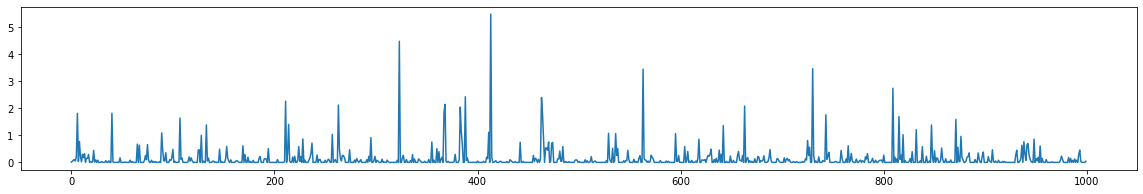

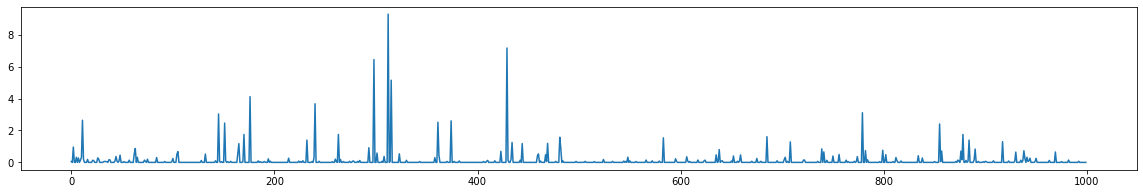

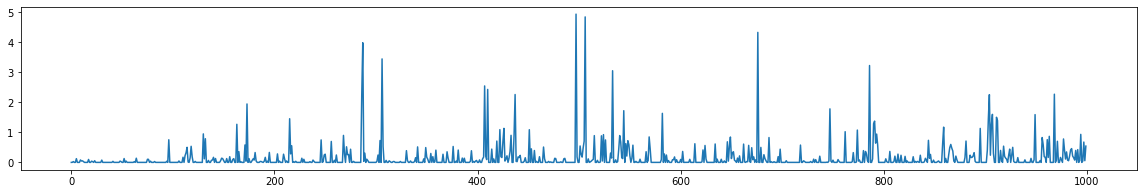

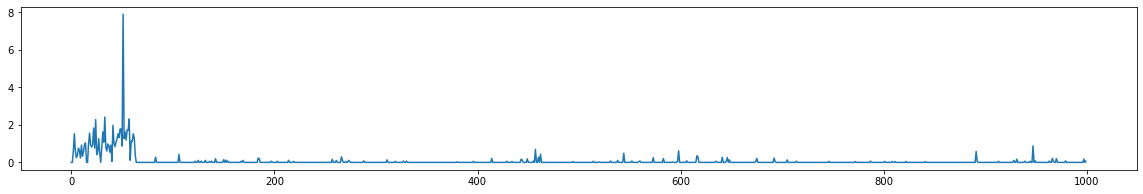

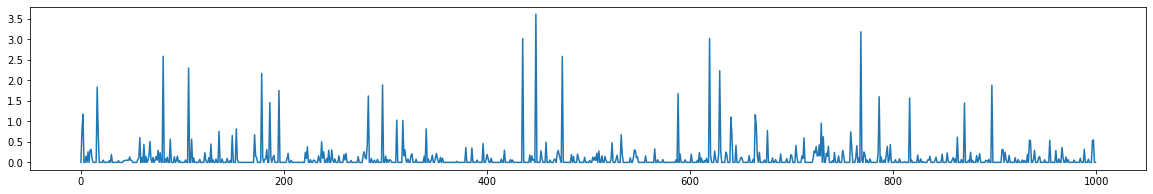

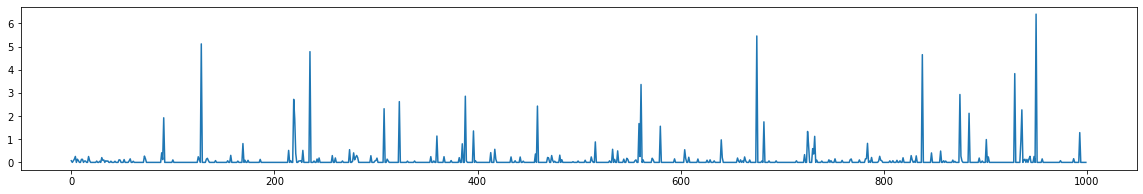

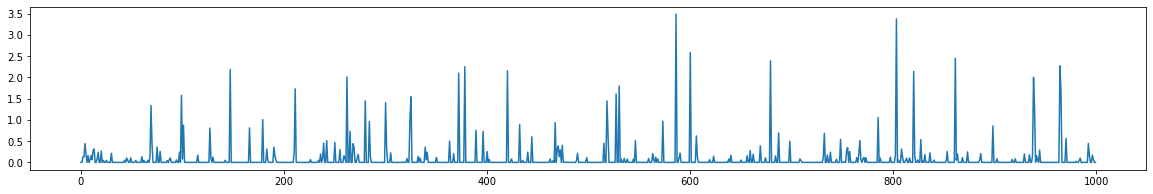

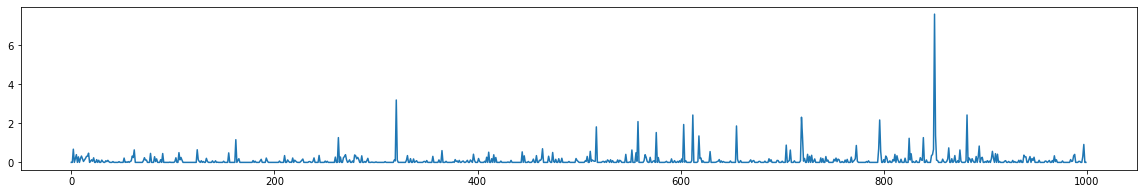

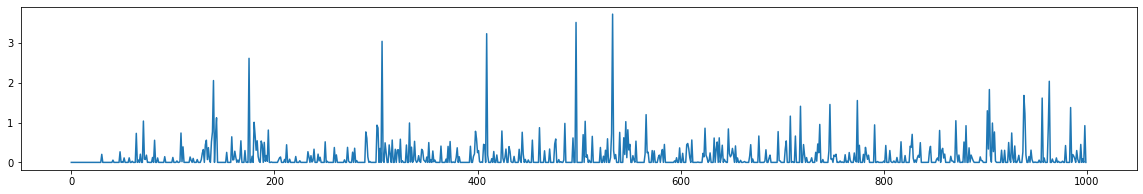

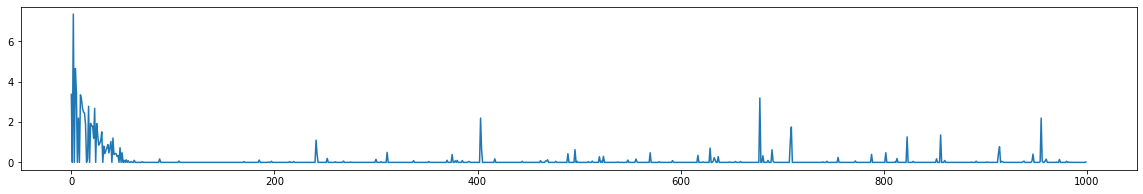

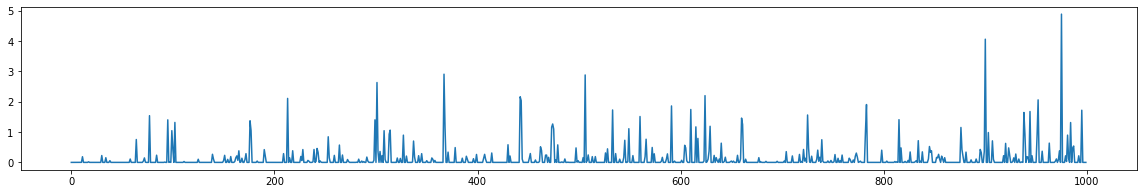

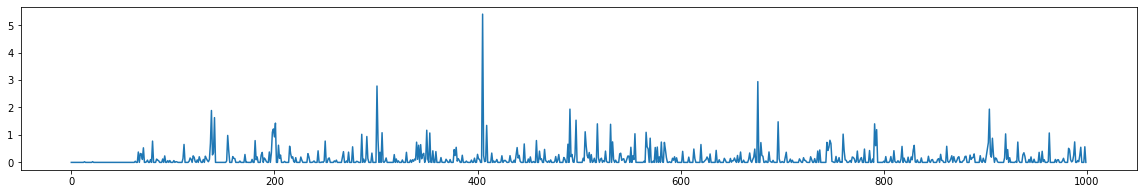

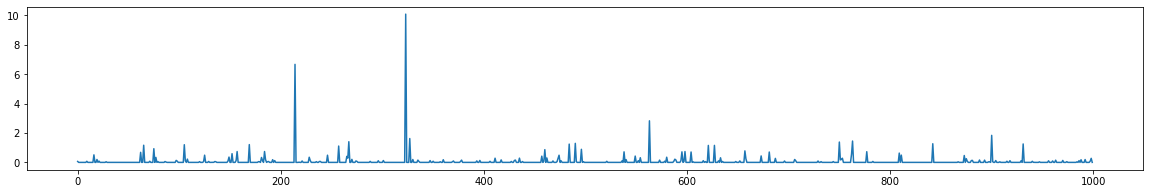

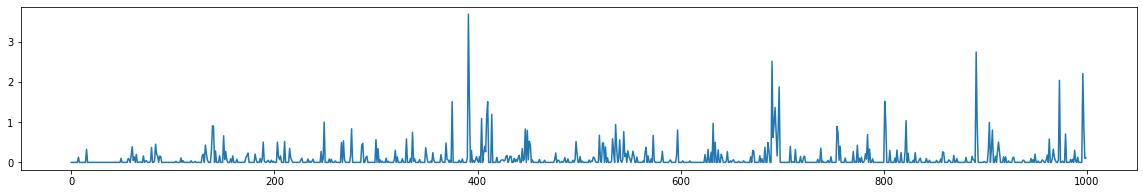

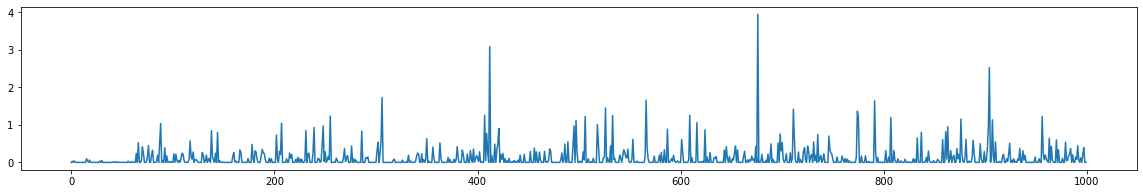

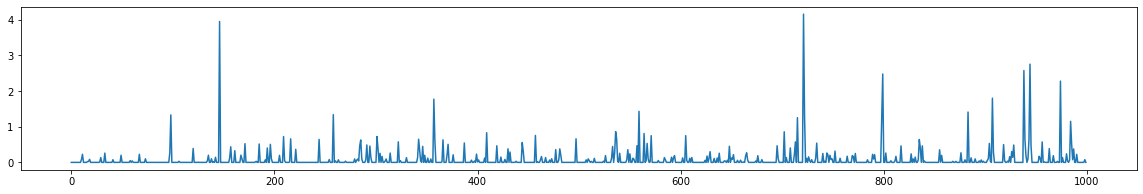

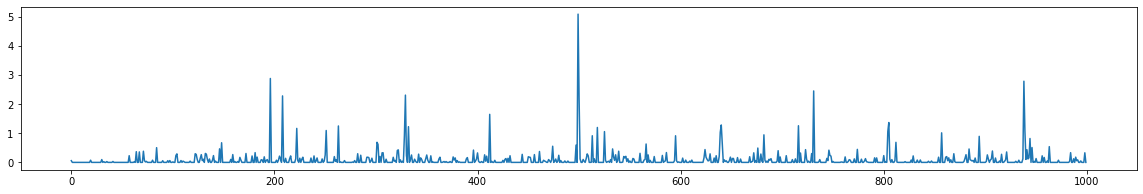

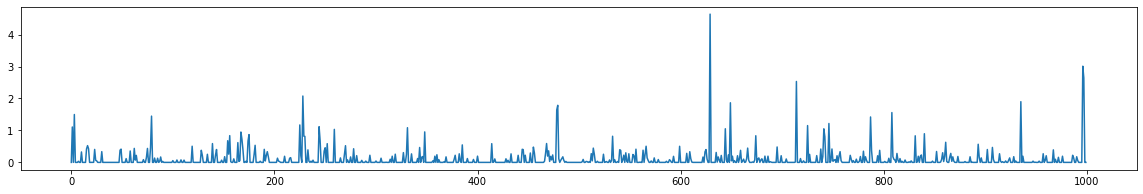

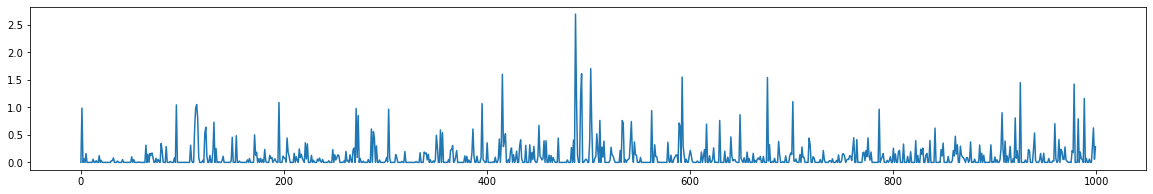

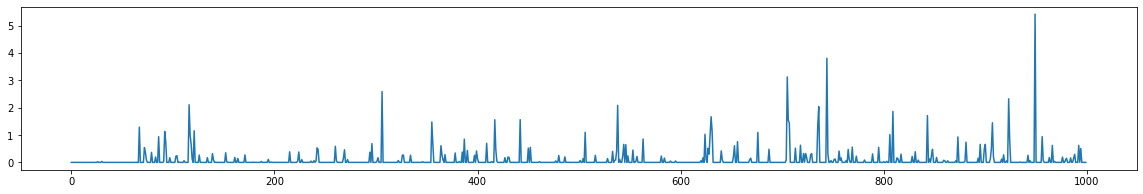

In [21]:
for i in range(0,20):
  
    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(topic_terms1[i])
    plt.show()


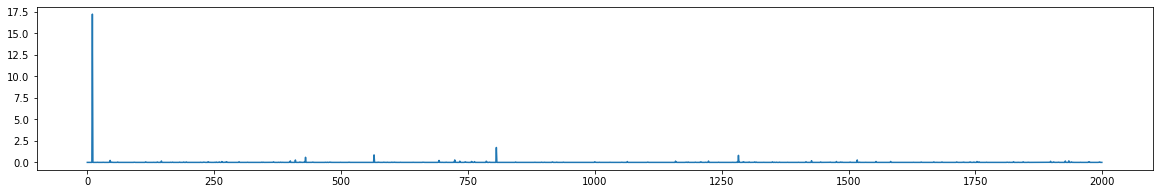

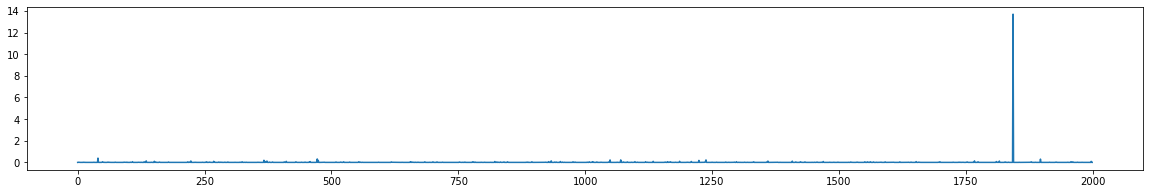

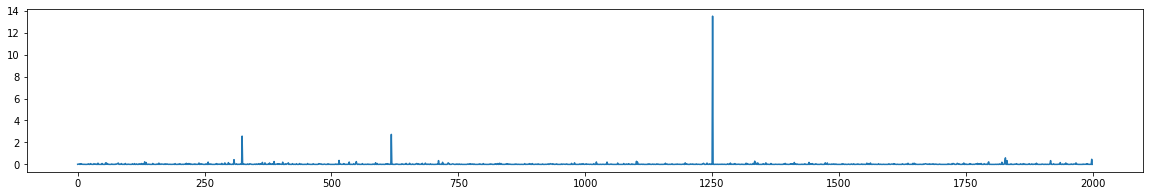

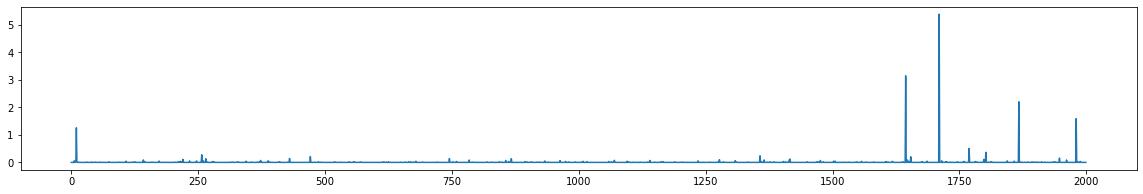

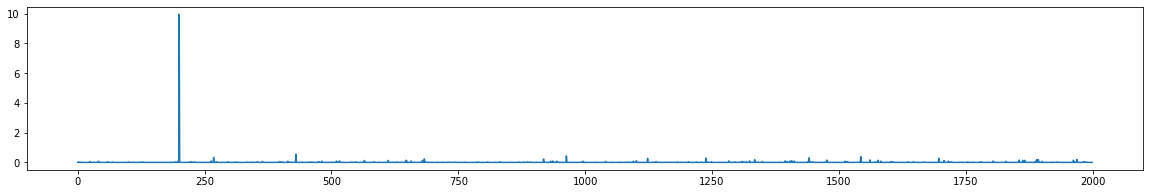

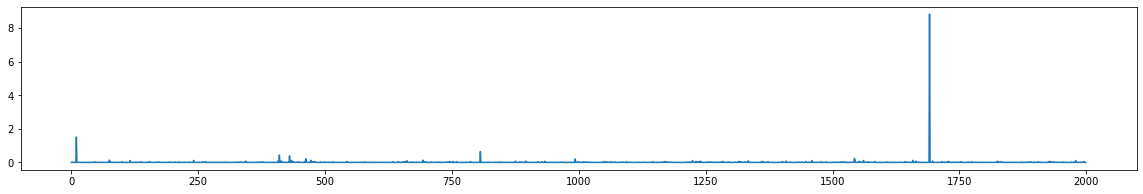

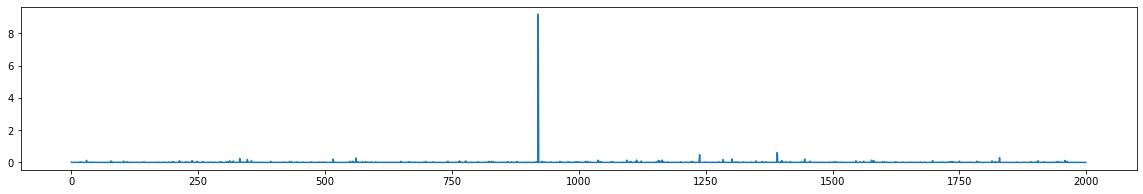

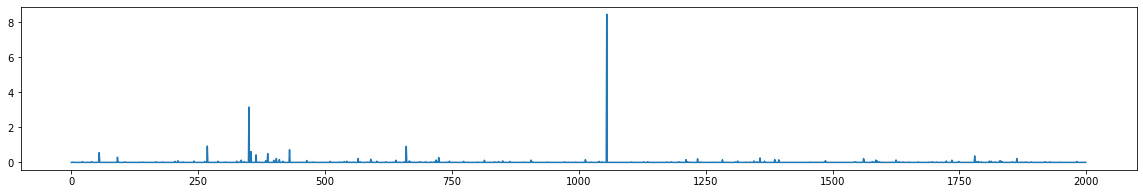

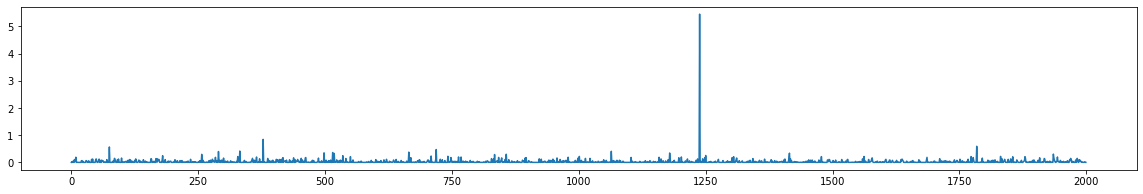

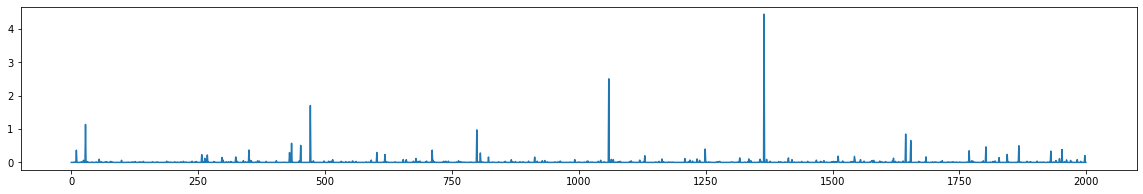

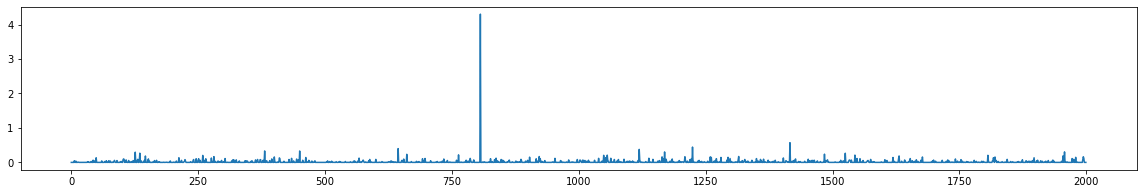

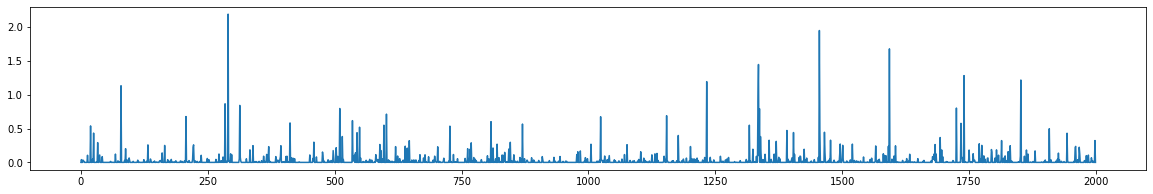

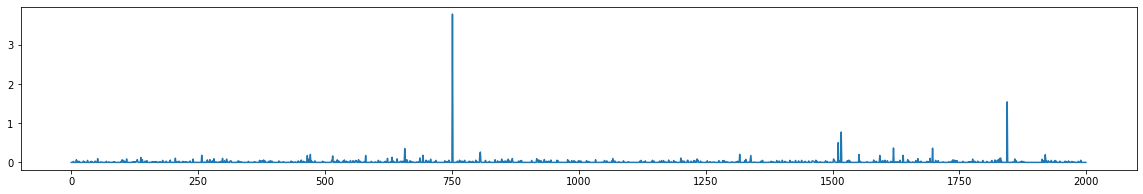

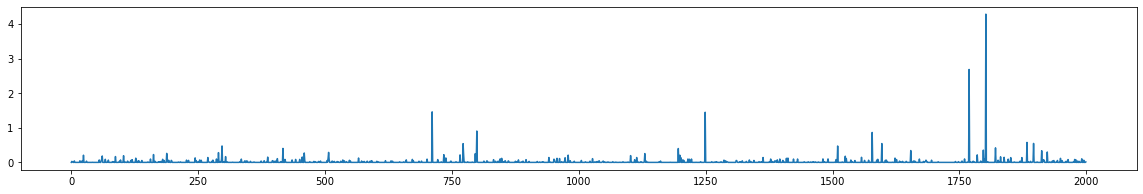

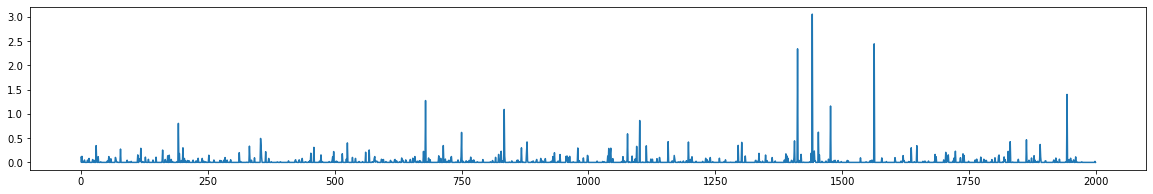

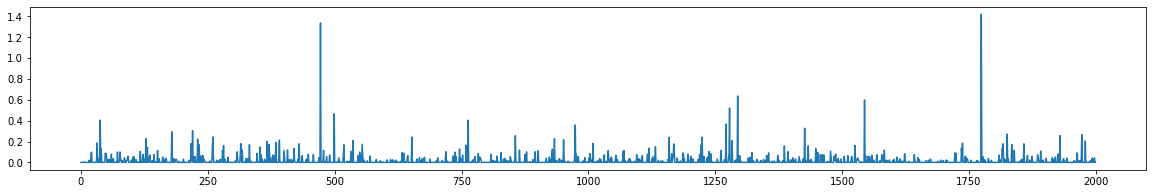

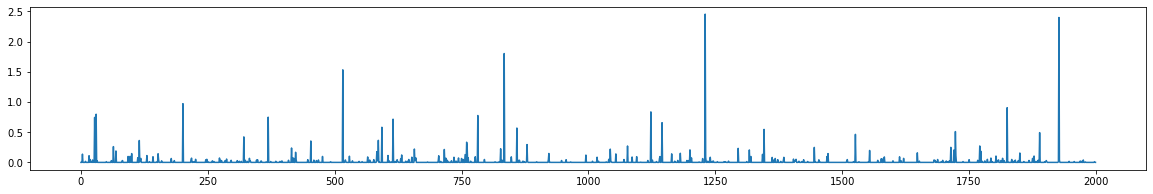

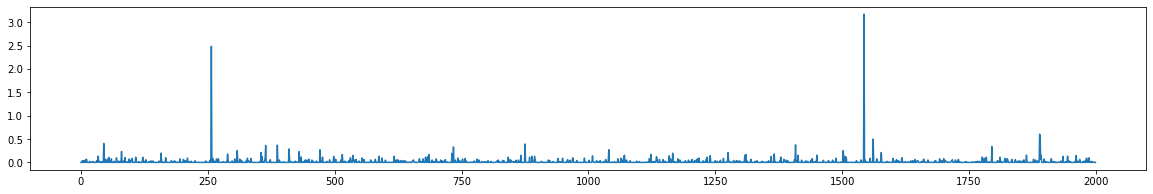

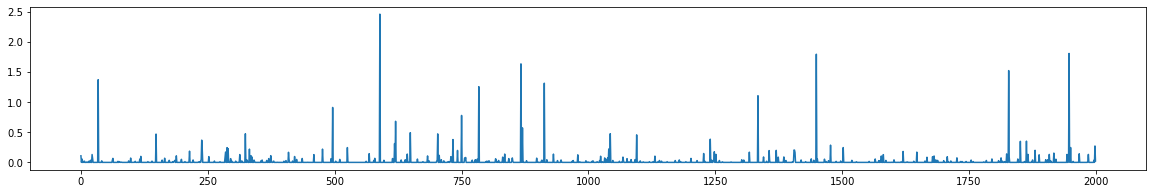

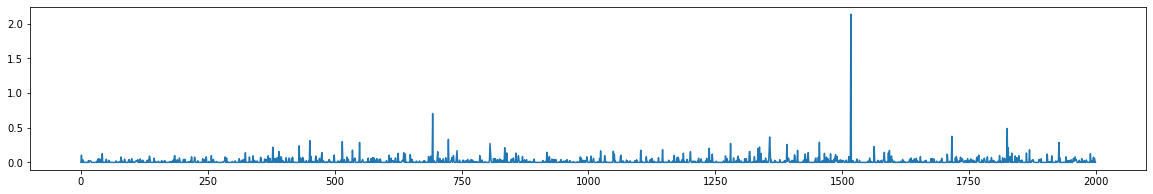

In [22]:
for i in range(0,20):
    #plt.plot(document_topics1[:,i])
    #plt.rcParams["figure.figsize"] = (5,3)
    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(document_topics1[:,i])
    
    plt.show()
    #plt.subplot(4,1,i-1)

# #print(A[:,0])

In [23]:
### Finding out the key topics and the top rated words to understand the topic subject

topic_key_term_idxs1 = np.argsort(-np.absolute(topic_terms1), axis=1)[:,:n_top_words]
topic_keyterms1 = vocabulary[topic_key_term_idxs1]
topics1 = [', '.join(topic1) for topic1 in topic_keyterms1]
pd.set_option('display.max_colwidth', -1)
topics_df1 = pd.DataFrame(topics1,columns = ['Terms per Topic'],index=['Topic'+str(t) for t in range(0, n_components)])
topics_df1

<ipython-input-23-ced69bfce417>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Terms per Topic
Topic0,"graphics, edu, pub, mail, send, ftp, image, code, files, data, package, format, file, 3d, 128, images, ray, server, archive, stuff"
Topic1,"drive, hard, disk, drives, card, controller, rom, bios, 16, floppy, feature, board, speed, supports, data, cable, pin, interface, mb, connector"
Topic2,"just, know, people, didn, don, said, like, going, got, went, heard, think, did, came, really, ll, maybe, time, ve, told"
Topic3,"55, 32, 80, 250, 40, 24, 500, 50, 72, 75, 66, 300, 200, 100, 48, 92, 49, 93, 60, 28"
Topic4,"hiv, research, national, health, aids, information, april, new, care, disease, test, 1993, children, medical, development, said, service, center, study, 10"
Topic5,"version, pc, available, contact, software, type, machines, sun, ftp, comments, edu, ibm, dos, unix, systems, anonymous, commercial, phone, mac, math"
Topic6,"means, section, military, state, person, weapon, following, black, gun, shall, firearm, dangerous, use, license, code, weapons, letter, application, effective, designed"
Topic7,"space, earth, surface, moon, probe, science, lunar, mission, orbit, launch, mars, spacecraft, nasa, probes, data, solar, shuttle, build, years, possible"
Topic8,"like, just, good, don, car, better, way, think, use, want, right, really, probably, work, thing, used, make, power, bike, stuff"
Topic9,"10, 11, 12, 00, 14, period, 15, 20, 16, 25, 17, 18, 13, gm, vs, 21, 26, 19, 22, 23"


In [24]:
pd.options.display.float_format = '{:,.5f}'.format
dt_df1 = pd.DataFrame(document_topics1,columns=['T'+str(i) for i in range(0, n_components)])
print(len(dt_df1))
print(dt_df1.head(10))

2000
       T0      T1      T2      T3      T4      T5      T6      T7      T8  \
0 0.00000 0.00000 0.00996 0.00000 0.00000 0.00000 0.01871 0.00000 0.00000   
1 0.00000 0.01799 0.02984 0.00000 0.00000 0.00000 0.00000 0.00000 0.02489   
2 0.00000 0.00000 0.01839 0.00000 0.03919 0.00000 0.00000 0.00000 0.00000   
3 0.00069 0.00963 0.03201 0.00000 0.00000 0.01206 0.00000 0.02009 0.03855   
4 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.04121   
5 0.00000 0.00000 0.04835 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
6 0.00000 0.00000 0.00000 0.05818 0.00000 0.00000 0.00000 0.00000 0.09702   
7 0.00000 0.00000 0.06145 0.00000 0.02457 0.00000 0.00000 0.00000 0.02228   
8 0.00000 0.00000 0.03087 0.00000 0.00000 0.00000 0.01463 0.00000 0.09624   
9 0.00000 0.00000 0.01331 0.01699 0.00000 0.00000 0.00000 0.00000 0.19044   

       T9     T10     T11     T12     T13     T14     T15     T16     T17  \
0 0.00000 0.00000 0.00000 0.00000 0.00000 0.10518 0.00000 0.00000 0.00

In [25]:
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_colwidth', 200)
max_score_topics1 = dt_df1.max(axis=0)
dominant_topics1 = max_score_topics1.index
term_score1 = max_score_topics1.values
document_numbers1 = [dt_df1[dt_df1[t] == max_score_topics1.loc[t]].index[0]
for t in dominant_topics1]
documents1 = [data_samples[i] for i in document_numbers1]
results_df1 = pd.DataFrame( {'Dominant Topic': dominant_topics1 , 'Max Score':term_score1,'Doc Num': document_numbers1, 'Topic': topics_df1['Terms per Topic'],'Paper Name': documents1})
results_df1

,Dominant Topic,Max Score,Doc Num,Topic,Paper Name
Topic0,T0,17.20507,10,"graphics, edu, pub, mail, send, ftp, image, code, files, data, package, format, file, 3d, 128, images, ray, server, archive, stuff",Archive-name: graphics/resources-list/part1\nLast-modified: 1993/04/17\n\n\nComputer Graphics Resource Listing : WEEKLY POSTING [ PART 1/3 ]\n===================================================\nL...
Topic1,T1,13.69940,1843,"drive, hard, disk, drives, card, controller, rom, bios, 16, floppy, feature, board, speed, supports, data, cable, pin, interface, mb, connector",Thanks to all who responded to my original post. I got the number for\nWestern Digital tech support and determined that I need to upgrade the\nBIOS to the Super BIOS. It will handle hard drives ...
Topic2,T2,13.50348,1251,"just, know, people, didn, don, said, like, going, got, went, heard, think, did, came, really, ll, maybe, time, ve, told",Accounts of Anti-Armenian Human Rights Violations in Azerbaijan #007\n Prelude to Current Events in Nagorno-Karabakh\n\n\n +--------------------------------------------------------...
Topic3,T3,5.38678,1710,"55, 32, 80, 250, 40, 24, 500, 50, 72, 75, 66, 300, 200, 100, 48, 92, 49, 93, 60, 28",Here is the price list for the week April 13 to April 19.\n\n\t- Andrew\n\nBuy\tSell\tPts\tTeam\tPlayer\n158.9\t143.0\t157\tPIT\tMario_Lemieux\n148.5\t133.7\t145\tBUF\tPat_LaFontaine\n142.7\t128.4...
Topic4,T4,9.96259,200,"hiv, research, national, health, aids, information, april, new, care, disease, test, 1993, children, medical, development, said, service, center, study, 10","------------- cut here -----------------\nlimits of AZT's efficacy and now suggest using the drug either sequentially \nwith other drugs or in a kind of AIDS treatment ""cocktail"" combining a num..."
Topic5,T5,8.81822,1691,"version, pc, available, contact, software, type, machines, sun, ftp, comments, edu, ibm, dos, unix, systems, anonymous, commercial, phone, mac, math","\n[not very comprehensive list deleted]\n\nThere is a very comprehensive list in sci.math.symbolic, \nwhich detailed descriptions of many packages. \n(Especially you, Mark, should update your list..."
Topic6,T6,9.18158,920,"means, section, military, state, person, weapon, following, black, gun, shall, firearm, dangerous, use, license, code, weapons, letter, application, effective, designed","[Note, Ohio legislation unlike Federal legislation, shows the entire\nlaw as it would be changed by the legislation. These parts are in\nALL CAPITALS, the rest (i.e., current law is in regular ty..."
Topic7,T7,8.47699,1055,"space, earth, surface, moon, probe, science, lunar, mission, orbit, launch, mars, spacecraft, nasa, probes, data, solar, shuttle, build, years, possible",Archive-name: space/probe\nLast-modified: $Date: 93/04/01 14:39:19 $\n\nPLANETARY PROBES - HISTORICAL MISSIONS\n\n This section was lightly adapted from an original posting by Larry Klaes\n ...
Topic8,T8,5.45469,1238,"like, just, good, don, car, better, way, think, use, want, right, really, probably, work, thing, used, make, power, bike, stuff",Archive-name: rec-autos/part5\n\n[this article is one of a pair of articles containing commonly\nasked automotive questions; the other article contains questions\nmore geared to the automotive ent...
Topic9,T9,4.44280,1365,"10, 11, 12, 00, 14, period, 15, 20, 16, 25, 17, 18, 13, gm, vs, 21, 26, 19, 22, 23",NHL RESULTS FOR GAMES PLAYED 4/15/93.\n\n--------------------------------------------------------------------------------\n STANDINGS\n PATRICK A...


In [26]:
data_samples[589]

'\nRef: Encyclopedia of Religion, Mircea Eliade\n\nMAGI: \n\n[Sneak Preview: Later still, eschatology and apocalyptics were a fertile meeting\n ground for Iranian and Judeo-Christian religions, as can be seen in the famous\n _Oracles of Hystaspes_, a work whose Iranian roots are undeniable and which\n most likely dates from the beginning of the Christian era, probably the\n second century CE (Widengren, 1968). The Zoroastrian doctrine of the Savior of\n the Future (Saoshyant) was the basis for the story of the coming of the Magi\n to Bethlehem in the _Gospel of Matthew_ (2:1-12).]\n\n  The Old Persian word magu, rendered in Greek by magos, is of uncertain \netymology. It may originally have meant "member of the tribe," as in the\nAvestan compound mogu-tbish ("hostile to a member of the tribe"). This meaning\nwould have been further resticted, among the Medes, to "member of the priestly\ntribe" and perhaps to "priest" (Benveniste, 1938; Boyce, 1982). The term is\nprobably of Median orig

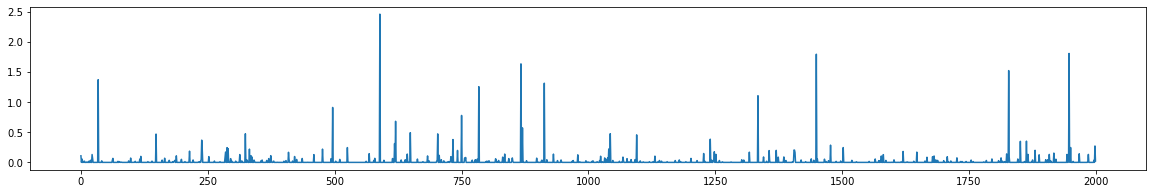

In [27]:
plt.plot(dt_df1['T18'])

In [28]:
data_samples[913]

'\n\nAnd the \'Turkish Karabag\' is next. As for \'Cyprus\', In 1974, Turkiye \nstepped into Cyprus to preserve the lives of the Turkish population \nthere. This is nothing but a simple historical fact. Unfortunately, \nthe intervention was too late at least for some of the victims. Mass \ngraves containing numerous bodies of women and children already showed \nwhat fate had been planned for a peaceful minority.\n\nThe problems in Cyprus have their origin in decades of \noppression of the Turkish population by the Greek Cypriot \nofficials and their violation of the co-founder status of \nthe Turks set out in the constitution. The coup d\'etat \nengineered by Greece in 1974 to execute a final solution \nto the Turkish problem was the savage blow that invoked \nTurkiye\'s intervention. Turkiye intervened reluctantly and \nonly as a last resort after exhausting all other avenues \nconsulting with Britain and Greece as the other two signatories \nto the treaty to protect the integrity of 

In [29]:
results_df1[18:19]

,Dominant Topic,Max Score,Doc Num,Topic,Paper Name
Topic18,T18,2.45770,589,"israel, killed, jews, greek, men, people, turkish, women, jewish, world, israeli, population, children, gay, armenians, anti, armenian, 000, dead, dog","\nRef: Encyclopedia of Religion, Mircea Eliade\n\nMAGI: \n\n[Sneak Preview: Later still, eschatology and apocalyptics were a fertile meeting\n ground for Iranian and Judeo-Christian religions, as ..."


In [30]:

# break the string into list of words 
str_list = ["graphics", "edu", "pub", "mail", "ray", "128", "send", "3d", "ftp", "objects", "server", "amiga", "image", "images", "files", "file", "archive", "package", "format", "stuff"
]
  
# gives set of unique words 
 
for words in str_list : 
    a= (tf[10, tf_feature_names.index(words)])/(tf[:, tf_feature_names.index(words)].toarray().sum())
    print('Normalized Frequency of ', words , 'is :' , round(a,3))
    

Normalized Frequency of  graphics is : 0.584
Normalized Frequency of  edu is : 0.239
Normalized Frequency of  pub is : 0.667
Normalized Frequency of  mail is : 0.254
Normalized Frequency of  ray is : 0.79
Normalized Frequency of  128 is : 0.716
Normalized Frequency of  send is : 0.251
Normalized Frequency of  3d is : 0.754
Normalized Frequency of  ftp is : 0.293
Normalized Frequency of  objects is : 0.727
Normalized Frequency of  server is : 0.304
Normalized Frequency of  amiga is : 0.674
Normalized Frequency of  image is : 0.25
Normalized Frequency of  images is : 0.37
Normalized Frequency of  files is : 0.229
Normalized Frequency of  file is : 0.157
Normalized Frequency of  archive is : 0.455
Normalized Frequency of  package is : 0.279
Normalized Frequency of  format is : 0.375
Normalized Frequency of  stuff is : 0.192


In [31]:

# break the string into list of words 
str_list = ["graphics", "edu", "pub", "mail", "ray", "128", "send", "3d", "ftp", "objects", "server", "amiga", "image", "images", "files", "file", "archive", "package", "format", "stuff"
]
  
# gives set of unique words 
 
for words in str_list : 
    a= (tf[1283, tf_feature_names.index(words)])/(tf[:, tf_feature_names.index(words)].toarray().sum())
    print('Normalized Frequency of ', words , 'is :' , round(a,3))

Normalized Frequency of  graphics is : 0.028
Normalized Frequency of  edu is : 0.0
Normalized Frequency of  pub is : 0.0
Normalized Frequency of  mail is : 0.0
Normalized Frequency of  ray is : 0.0
Normalized Frequency of  128 is : 0.0
Normalized Frequency of  send is : 0.005
Normalized Frequency of  3d is : 0.0
Normalized Frequency of  ftp is : 0.0
Normalized Frequency of  objects is : 0.0
Normalized Frequency of  server is : 0.0
Normalized Frequency of  amiga is : 0.0
Normalized Frequency of  image is : 0.125
Normalized Frequency of  images is : 0.068
Normalized Frequency of  files is : 0.025
Normalized Frequency of  file is : 0.0
Normalized Frequency of  archive is : 0.0
Normalized Frequency of  package is : 0.093
Normalized Frequency of  format is : 0.016
Normalized Frequency of  stuff is : 0.0


In [32]:
# break the string into list of words 

str_list = ['magi', 'greek', 'turkish', 'new', 'later', 'old', 'armenians', 'children', 'western', 'armenian', 'term', 'population', '000', 'jews', "12", 'period', 'dead', 'killed', 'azerbaijan', 'time']
  
# gives set of unique words 
 
for words in str_list : 
    a_913= (tf[913, tf_feature_names.index(words)])/(tf[:, tf_feature_names.index(words)].toarray().sum())
    print('Normalized Frequency of ', words , 'is :' , round(a_913,3))

#print("----------------------------------------------------------------")  


Normalized Frequency of  magi is : 0.0
Normalized Frequency of  greek is : 0.238
Normalized Frequency of  turkish is : 0.351
Normalized Frequency of  new is : 0.0
Normalized Frequency of  later is : 0.0
Normalized Frequency of  old is : 0.011
Normalized Frequency of  armenians is : 0.0
Normalized Frequency of  children is : 0.023
Normalized Frequency of  western is : 0.0
Normalized Frequency of  armenian is : 0.0
Normalized Frequency of  term is : 0.0
Normalized Frequency of  population is : 0.149
Normalized Frequency of  000 is : 0.0
Normalized Frequency of  jews is : 0.0
Normalized Frequency of  12 is : 0.045
Normalized Frequency of  period is : 0.0
Normalized Frequency of  dead is : 0.0
Normalized Frequency of  killed is : 0.012
Normalized Frequency of  azerbaijan is : 0.0
Normalized Frequency of  time is : 0.0


In [33]:
# gives set of unique words 
 
for words in str_list : 
    a_589= (tf[589, tf_feature_names.index(words)])/(tf[:, tf_feature_names.index(words)].toarray().sum())
    print('Normalized Frequency of ', words , 'is :' , round(a_589,3))

Normalized Frequency of  magi is : 0.973
Normalized Frequency of  greek is : 0.079
Normalized Frequency of  turkish is : 0.0
Normalized Frequency of  new is : 0.009
Normalized Frequency of  later is : 0.055
Normalized Frequency of  old is : 0.022
Normalized Frequency of  armenians is : 0.0
Normalized Frequency of  children is : 0.0
Normalized Frequency of  western is : 0.167
Normalized Frequency of  armenian is : 0.0
Normalized Frequency of  term is : 0.149
Normalized Frequency of  population is : 0.0
Normalized Frequency of  000 is : 0.0
Normalized Frequency of  jews is : 0.0
Normalized Frequency of  12 is : 0.013
Normalized Frequency of  period is : 0.061
Normalized Frequency of  dead is : 0.0
Normalized Frequency of  killed is : 0.012
Normalized Frequency of  azerbaijan is : 0.0
Normalized Frequency of  time is : 0.008


In [34]:
for words in str_list : 
    a_589= (tf[589, tf_feature_names.index(words)])
    print(' Frequency of ', words , 'is :' , round(a_589,3))

 Frequency of  magi is : 36
 Frequency of  greek is : 5
 Frequency of  turkish is : 0
 Frequency of  new is : 4
 Frequency of  later is : 6
 Frequency of  old is : 4
 Frequency of  armenians is : 0
 Frequency of  children is : 0
 Frequency of  western is : 7
 Frequency of  armenian is : 0
 Frequency of  term is : 7
 Frequency of  population is : 0
 Frequency of  000 is : 0
 Frequency of  jews is : 0
 Frequency of  12 is : 2
 Frequency of  period is : 7
 Frequency of  dead is : 0
 Frequency of  killed is : 1
 Frequency of  azerbaijan is : 0
 Frequency of  time is : 4
